In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

<ipython-input-88-4b6adf6ab93f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


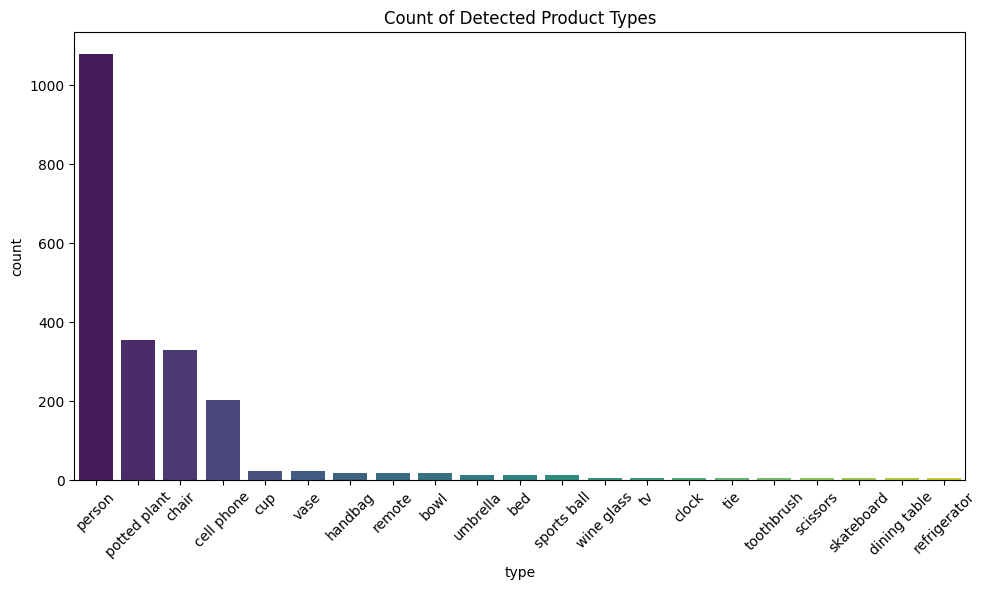

In [ ]:
def plot_detected_product_type_count(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')

    plt.title('Count of Detected Product Types')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

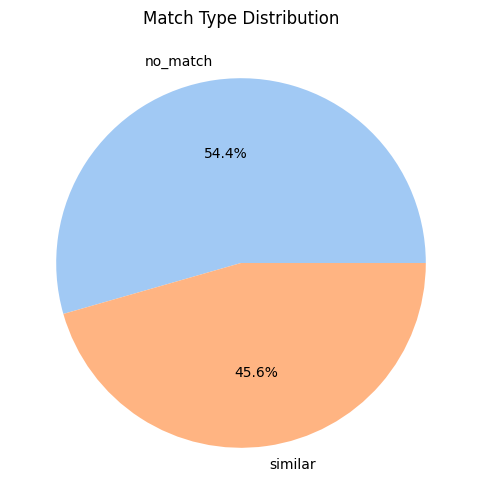

In [ ]:
def plot_match_type_distribution(df):
    plt.figure(figsize=(6, 6))
    match_counts = df['match_type'].value_counts()

    plt.pie(
        match_counts,
        labels=match_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel')
    )
    plt.title('Match Type Distribution')
    plt.show()

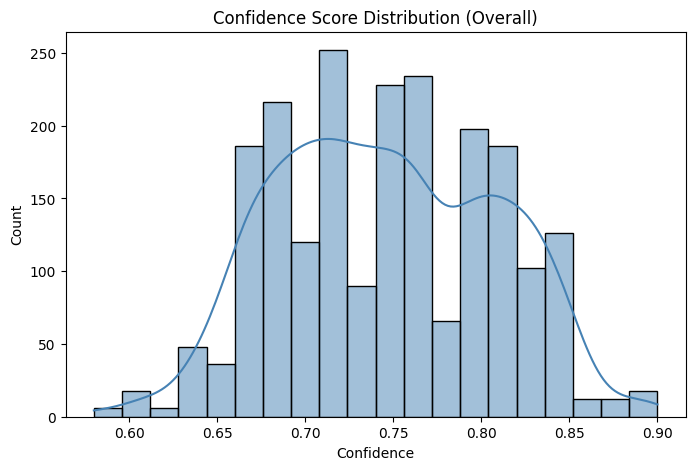

In [ ]:
def plot_confidence_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['confidence'], bins=20, kde=True, color='steelblue')

    plt.title('Confidence Score Distribution (Overall)')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.show()

<ipython-input-91-d54edb04b7fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['type'].isin(top_types)], x='type', y='confidence', palette='Set2')


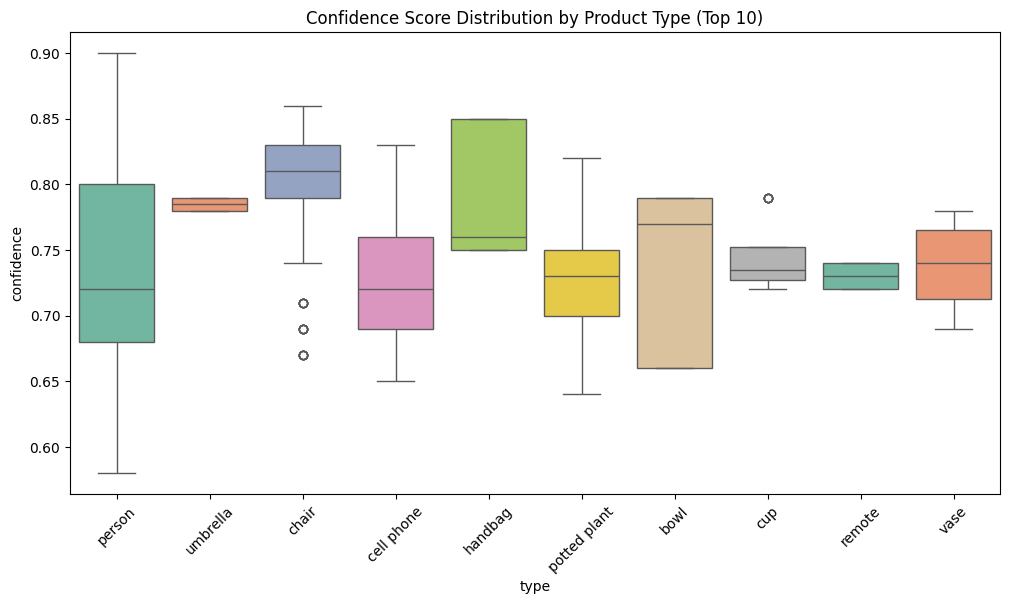

In [ ]:
def plot_confidence_by_top_types(df):
    top_types = df['type'].value_counts().nlargest(10).index
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df[df['type'].isin(top_types)],
        x='type',
        y='confidence',
        palette='Set2'
    )

    plt.title('Confidence Score Distribution by Product Type (Top 10)')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-92-12ff5638bf2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_conf_type.index, y=avg_conf_type.values, palette='magma')


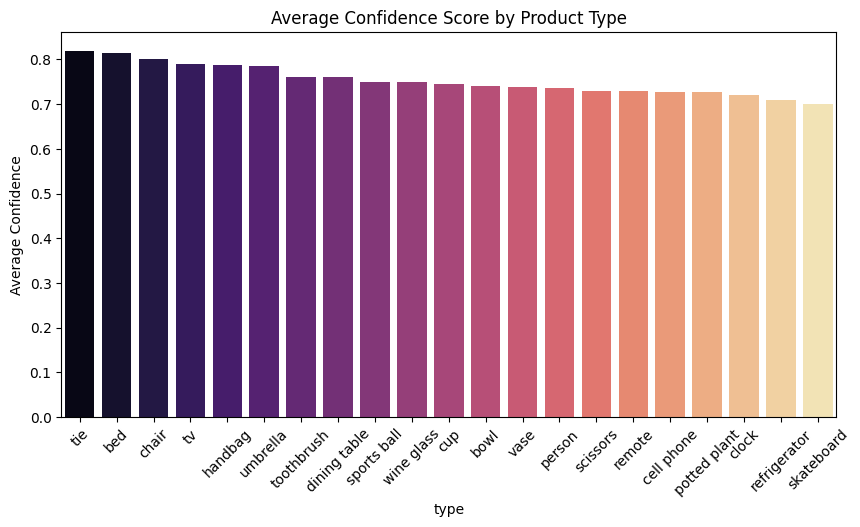

In [ ]:
def plot_avg_confidence_by_type(df):
    avg_conf_type = df.groupby('type')['confidence'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=avg_conf_type.index,
        y=avg_conf_type.values,
        palette='magma'
    )

    plt.title('Average Confidence Score by Product Type')
    plt.ylabel('Average Confidence')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-93-328a69dbcfee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_conf_match.index, y=avg_conf_match.values, palette='coolwarm')


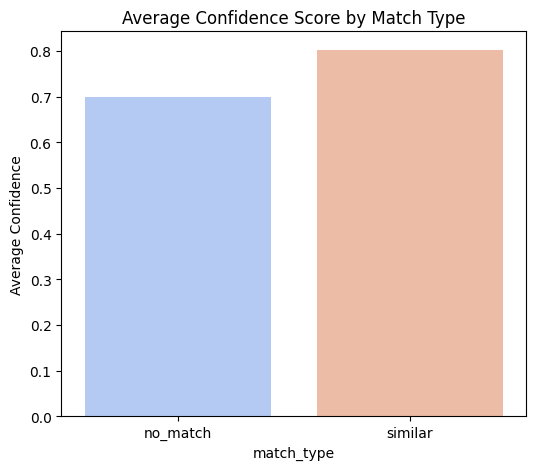

In [ ]:
def plot_avg_confidence_by_match_type(df):
    avg_conf_match = df.groupby('match_type')['confidence'].mean()
    plt.figure(figsize=(6, 5))
    sns.barplot(
        x=avg_conf_match.index,
        y=avg_conf_match.values,
        palette='coolwarm'
    )

    plt.title('Average Confidence Score by Match Type')
    plt.ylabel('Average Confidence')
    plt.show()

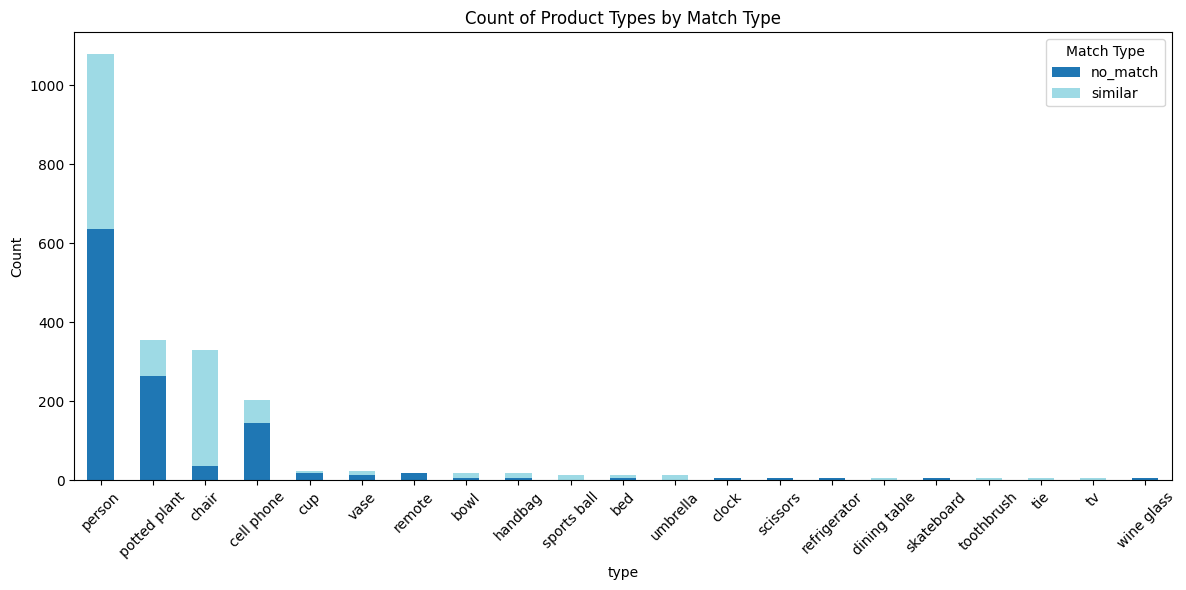

In [ ]:
def plot_type_match_counts(df):
    counts = df.groupby(['type', 'match_type']).size().unstack(fill_value=0)
    counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]
    counts.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20'
    )

    plt.title('Count of Product Types by Match Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Match Type')
    plt.tight_layout()
    plt.show()

<ipython-input-95-c392751a1e01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='match_type', y='confidence', palette='pastel')


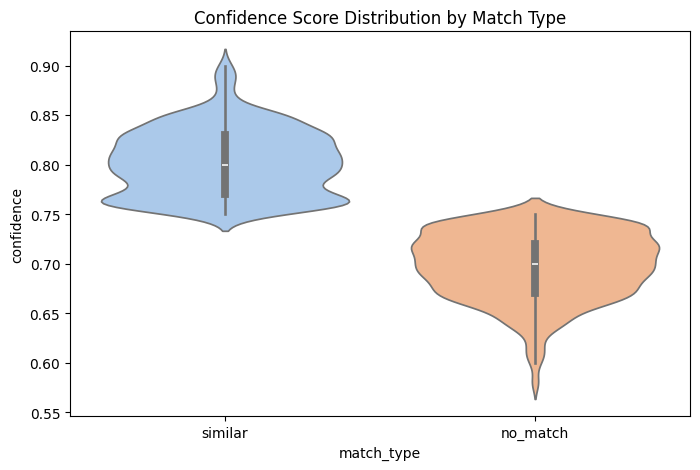

In [ ]:
def plot_violin_confidence_by_match_type(df):
    plt.figure(figsize=(8, 5))
    sns.violinplot(
        data=df,
        x='match_type',
        y='confidence',
        palette='pastel'
    )

    plt.title('Confidence Score Distribution by Match Type')
    plt.show()

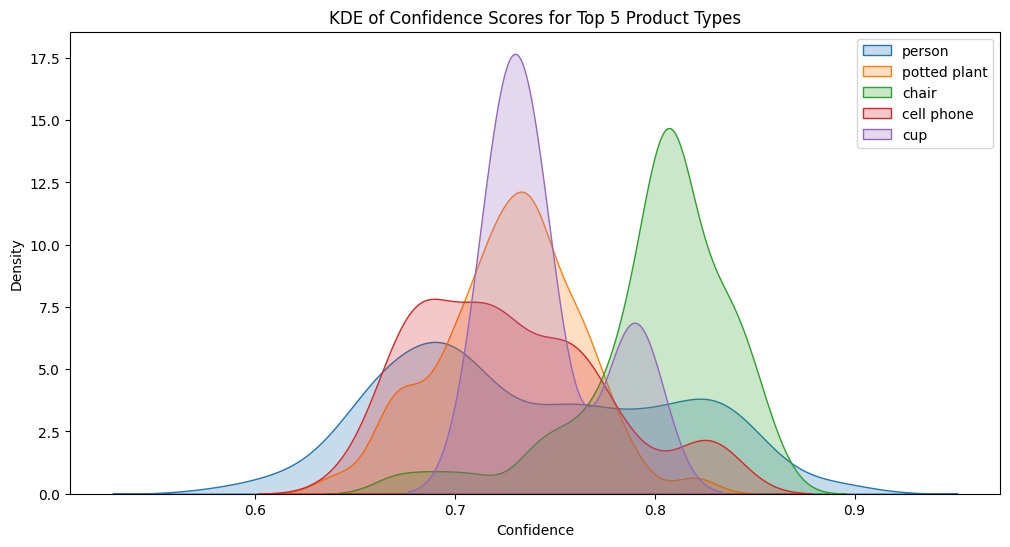

In [ ]:
def plot_kde_confidence_top5_types(df):
    top5_types = df['type'].value_counts().head(5).index
    plt.figure(figsize=(12, 6))
    for ptype in top5_types:
        subset = df[df['type'] == ptype]
        sns.kdeplot(
            subset['confidence'],
            label=ptype,
            fill=True
        )

    plt.title('KDE of Confidence Scores for Top 5 Product Types')
    plt.xlabel('Confidence')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

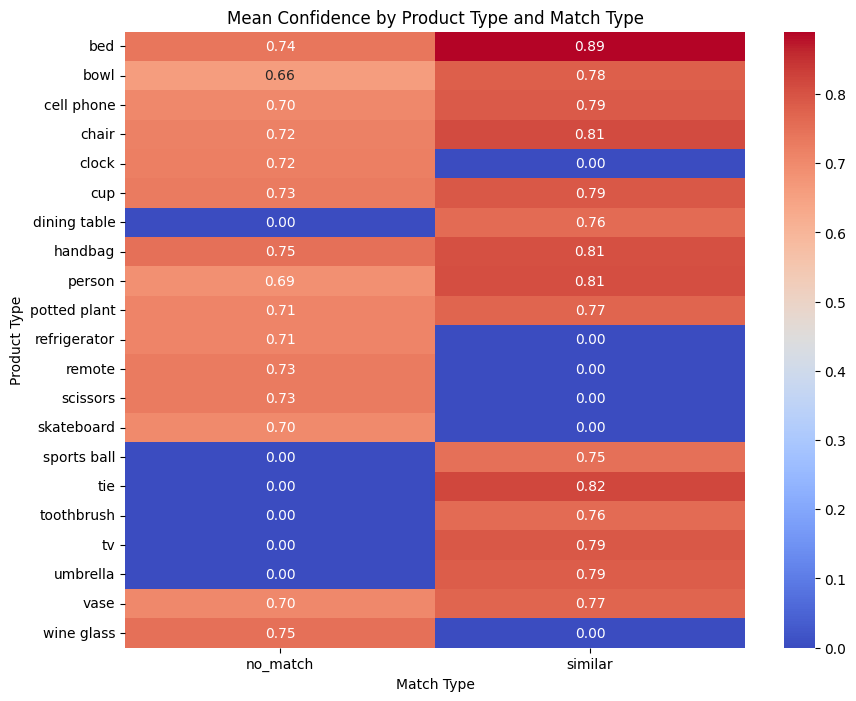

In [ ]:
def plot_confidence_heatmap(df):
    heatmap_data = df.pivot_table(
        index='type',
        columns='match_type',
        values='confidence',
        aggfunc='mean',
        fill_value=0
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap='coolwarm'
    )

    plt.title('Mean Confidence by Product Type and Match Type')
    plt.ylabel('Product Type')
    plt.xlabel('Match Type')
    plt.show()

<ipython-input-101-feca6673b234>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['type'].isin(top5_types)], x='type', y='confidence', showfliers=True, palette='Set2')


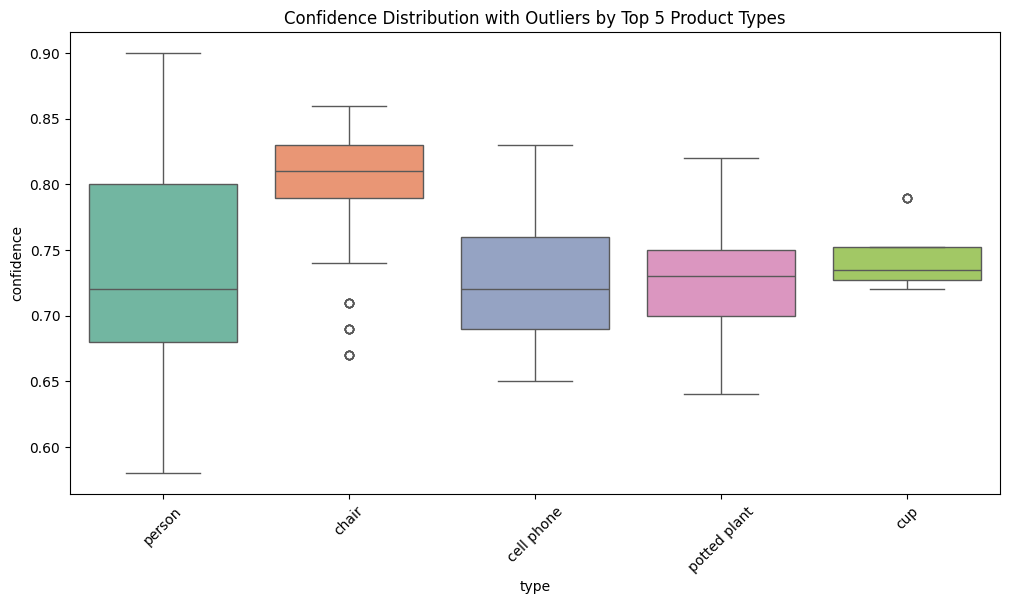

In [ ]:
def plot_box_confidence_top5_types(df):
    top5_types = df['type'].value_counts().head(5).index
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df[df['type'].isin(top5_types)],
        x='type',
        y='confidence',
        showfliers=True,
        palette='Set2'
    )

    plt.title('Confidence Distribution with Outliers by Top 5 Product Types')
    plt.xticks(rotation=45)
    plt.show()

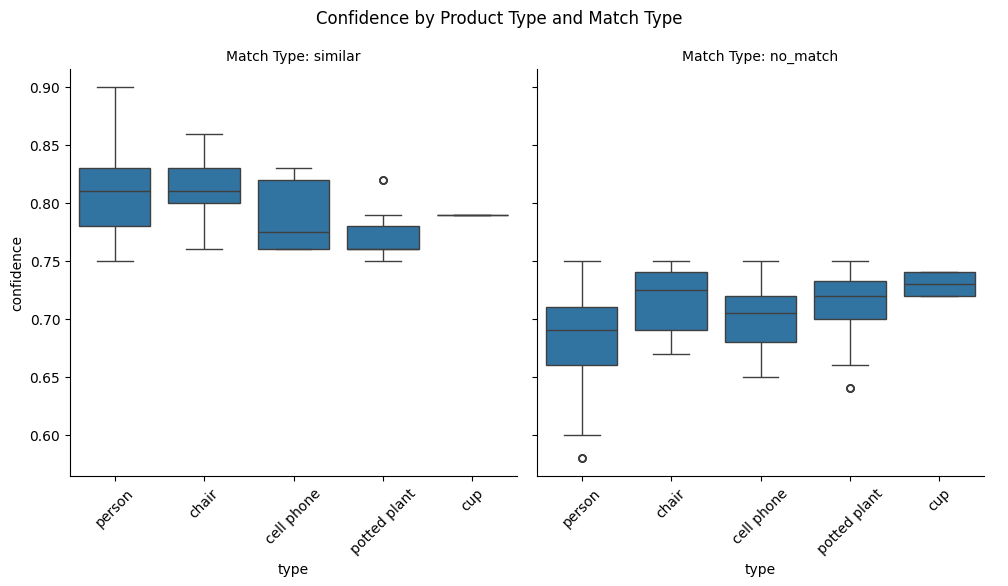

In [ ]:
def plot_cat_confidence_by_type_match(df):
    top5_types = df['type'].value_counts().head(5).index
    g = sns.catplot(
        data=df[df['type'].isin(top5_types)],
        x='type',
        y='confidence',
        col='match_type',
        kind='box',
        height=5,
        aspect=1
    )

    g.set_titles('Match Type: {col_name}')
    g.set_xticklabels(rotation=45)
    g.fig.suptitle('Confidence by Product Type and Match Type', y=1.05)
    plt.show()

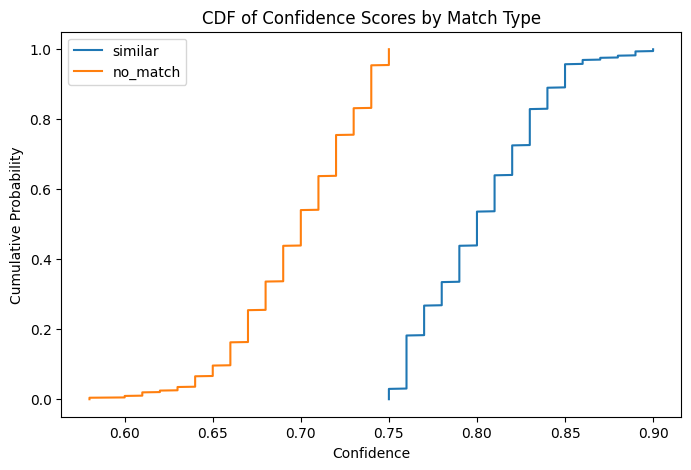

In [ ]:
def plot_cdf_confidence_by_match_type(df):
    plt.figure(figsize=(8, 5))
    for mt in df['match_type'].dropna().unique():
        conf_sorted = np.sort(df[df['match_type'] == mt]['confidence'])
        cdf = np.arange(len(conf_sorted)) / float(len(conf_sorted))
        plt.plot(
            conf_sorted,
            cdf,
            label=mt
        )

    plt.title('CDF of Confidence Scores by Match Type')
    plt.xlabel('Confidence')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()